In [215]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date


ticker = 'AAPL'
current = yf.Ticker(ticker)
cashflow = current.quarterly_cashflow
financials = current.quarterly_financials
balance_sheet = current.quarterly_balance_sheet
earnings = current.quarterly_earnings #does not have a date. quarter basis

fivey_hist = current.history(period="5y")

In [208]:
balance_sheet

,2022-06-25,2022-03-26,2021-12-25,2021-09-25
Total Liab,2.782020e+11,2.832630e+11,3.092590e+11,2.879120e+11
Total Stockholder Equity,5.810700e+10,6.739900e+10,7.193200e+10,6.309000e+10
Other Current Liab,5.653900e+10,5.816800e+10,5.704300e+10,5.357700e+10
Total Assets,3.363090e+11,3.506620e+11,3.811910e+11,3.510020e+11
Common Stock,6.211500e+10,6.118100e+10,5.842400e+10,5.736500e+10
Other Current Assets,1.638600e+10,1.580900e+10,1.811200e+10,1.411100e+10
Retained Earnings,5.289000e+09,1.271200e+10,1.443500e+10,5.562000e+09
Other Liab,5.362900e+10,5.243200e+10,5.505600e+10,4.305000e+10
Gains Losses Not Affecting Retained Earnings,-9.297000e+09,-6.494000e+09,-9.270000e+08,1.630000e+08
Other Assets,5.260500e+10,5.195900e+10,5.010900e+10,3.876200e+10


In [210]:
file_dates = [date.today().strftime('%Y-%m-%d')]
for date in balance_sheet.columns.to_list():
    while date.strftime('%Y-%m-%d') not in fivey_hist["Close"].keys():
        date = date - pd.Timedelta(days=1)
    file_dates.insert(0, date.strftime('%Y-%m-%d'))
file_dates

['2021-09-24', '2021-12-23', '2022-03-25', '2022-06-24', '2022-08-16']

In [211]:
quarter_close_price = [fivey_hist["Close"].loc[date] for date in file_dates]
quarter_close_price

[146.10130310058594,
 175.5535430908203,
 174.22166442871094,
 141.4635009765625,
 173.02999877929688]

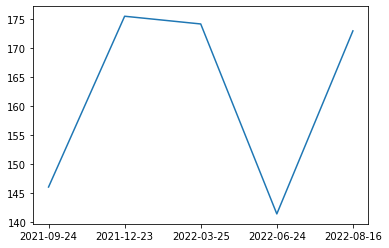

In [212]:
plt.plot(file_dates, quarter_close_price)